In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import Task1
import Task2

In [10]:
#Load Data
X0 = np.loadtxt('linear_vectorfield_data_x0.txt')
X1 = np.loadtxt('linear_vectorfield_data_x1.txt')

#Calc. finite differences t = 0.1
V1 = Task2.finite_diff(X0, X1, 0.1)
#Approx. A 
A1 = Task1.least_squares(X0, V1)
print(A1.dot(X0[0]))
V1[0]

[-0.18409957  0.34489241]


array([-0.18409949,  0.34489229])

In [11]:
#Calc. finite differences t = 0.1
V = Task2.finite_diff(X0, X1, 0.1)
#Approx. A 
A = Task1.least_squares(X0, V)

#Take new VectorField and Calc the x_1 and estimate the error
X_hat = (A@X0.T).T
error = Task2.error_estimation(X_hat, X1)
print(error)

8.966312750462978e-05


In [12]:
X0 = np.array([10, 10])
X1 = np.empty((1000,2))

In [13]:
#Evolve in Time with the Aprroximation of the Vector field.
X1[0]=X0
for t in range(1,1000):
    X1[t] = (A@X0.T).T
    X0=X1[t]

In [14]:
print(X1)
print(X1.shape)

[[ 1.00000000e+001  1.00000000e+001]
 [ 2.61640923e+000  1.42119893e+001]
 [-2.00458897e+000  1.48197650e+001]
 ...
 [-3.88134794e-118  3.17053168e-117]
 [-9.26847722e-118  2.85536416e-117]
 [-1.11963983e-117  2.30376287e-117]]
(1000, 2)


In [15]:
fig = plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

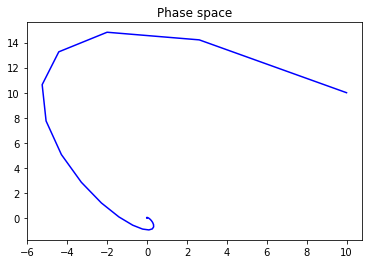

In [16]:
#Plot the phase space.
Task2.plot_phase_2D(X1, 'blue')

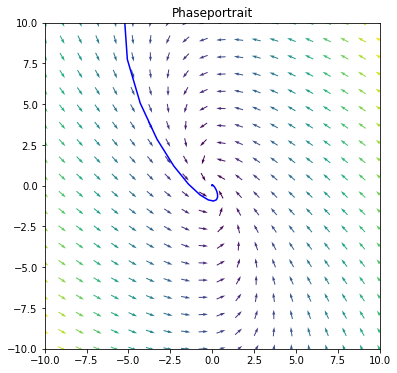

In [17]:
#Plot the Phase portrait.
fig = plt.figure(figsize=(6,6))
Task2.plot_phase_portrait_2D(fig, X1, A, 'blue', x_min=-10, x_max=10, y_min=-10, y_max=+10)